In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

In [4]:
df=pd.read_csv("iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
df=df.drop('Id', axis=1)

In [6]:
# Select only two features for easy plotting
X = df[["SepalLengthCm", "SepalWidthCm"]]
y = df["Species"]

In [7]:
# Normalize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [9]:
# Train with chosen K
best_k = 5
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [10]:
# Predictions
y_pred = knn.predict(X_test)

Accuracy: 0.8
Confusion Matrix:


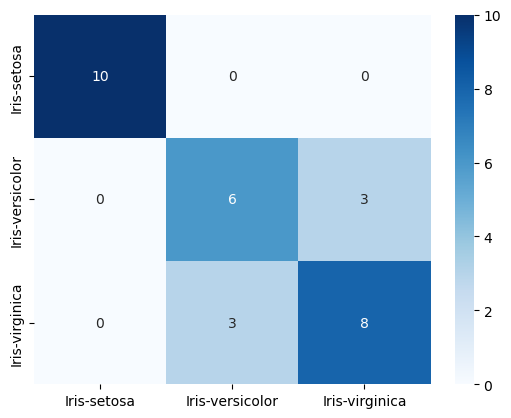

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.67      0.67      0.67         9
 Iris-virginica       0.73      0.73      0.73        11

       accuracy                           0.80        30
      macro avg       0.80      0.80      0.80        30
   weighted avg       0.80      0.80      0.80        30



In [11]:
# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=df["Species"].unique(), yticklabels=df["Species"].unique())
plt.show()
print("Classification Report:")
print(classification_report(y_test, y_pred))

In [12]:
# Decision boundary visualization
h = .02  # step size in mesh
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = np.array([{"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica": 2}[label] for label in Z])
Z = Z.reshape(xx.shape)

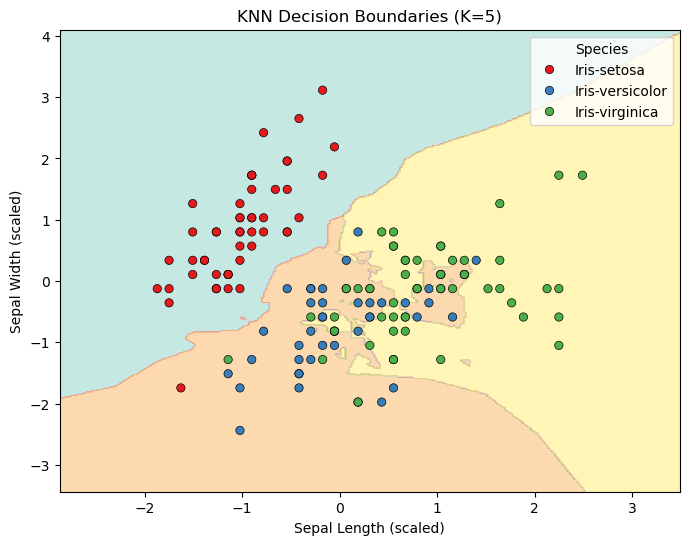

In [13]:
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.Set3, alpha=0.5)
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=y, palette='Set1', edgecolor='k')
plt.title(f"KNN Decision Boundaries (K={best_k})")
plt.xlabel("Sepal Length (scaled)")
plt.ylabel("Sepal Width (scaled)")
plt.show()